# ROC (Receiver Operating Characteristics) 
# AUC Concept

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

#### import dataset

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

#### Separate Features and target

In [5]:
y = data['target']

In [6]:
X = pd.DataFrame(data = data['data'], columns=data['feature_names'])

In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X = sc.fit_transform(X)

### Separating the training and testing dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Building Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_reg = LogisticRegression()

In [15]:
log_reg.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred1 = log_reg.predict(X_test)

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



#### ROC AUC Curve for Logistic Regression

In [19]:
#fpr = False Positive Rate (1 - Specificity)
#tpr = True Positive Rate (Sensitivity)
#thr = threshhold
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred1)

In [20]:
#Getting Area under ROC curve
auc_score = metrics.roc_auc_score(y_test, y_pred1)

In [21]:
auc_score

0.9725108225108225

In [22]:
#Another way to get the same Aread Under ROC
#auc_score = metrics.auc(fpr, tpr)

In [23]:
roc_auc

0.9725108225108225

#### Plotting AU ROC

Text(0.5, 0, 'False Positive Rate')

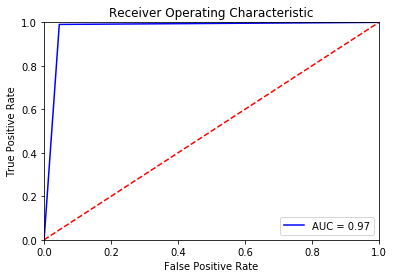

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Building SVM Model

In [25]:
from sklearn.svm import SVC

In [26]:
svc_reg = SVC(C=10, gamma=0.01)

In [27]:
svc_reg.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_pred2 = svc_reg.predict(X_test)

In [29]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.98      1.00      0.99       105

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



#### Plotting the AUROC on Logistic AUROC graph

In [32]:
fpr2, tpr2, thr2 = metrics.roc_curve(y_test, y_pred2)

In [33]:
auc_score2 = metrics.roc_auc_score(y_test, y_pred2)

In [34]:
auc_score2

0.9848484848484849

Text(0.5, 0, 'False Positive Rate')

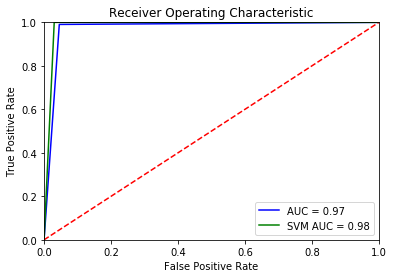

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_score)
plt.plot(fpr2, tpr2, 'b', label = 'SVM AUC = %0.2f' % auc_score2, color='green')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Grid Search for SVM

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_params = {'C':[1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001], 'kernel':['rbf','poly'],'degree':[3,4,5,6,7]}

In [38]:
gs_reg = GridSearchCV(svc_reg, grid_params, verbose= 3)

In [39]:
gs_reg.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=0.932, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=0.955, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=0.977, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=0.1, kernel=poly, score=0.932, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=0.1, kernel=poly, score=0.977, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=3, gamma=0.1, kernel=poly, score=0.977, total=   0.0s
[CV] C=1, degree=3, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, 

[CV]  C=1, degree=5, gamma=0.0001, kernel=poly, score=0.636, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=0.1, kernel=rbf, score=0.932, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=0.1, kernel=rbf, score=0.955, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=6, gamma=0.1, kernel=rbf, score=0.977, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=0.1, kernel=poly, score=0.707, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=0.1, kernel=poly, score=0.737, total=   0.0s
[CV] C=1, degree=6, gamma=0.1, kernel=poly ...........................
[CV]  C=1, degree=6, gamma=0.1, kernel=poly, score=0.795, total=   0.0s
[CV] C=1, degree=6, gamma=0.01, kernel=rbf ...........................

[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=0.962, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=0.985, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=rbf ..........................
[CV]  C=10, degree=4, gamma=0.01, kernel=rbf, score=0.977, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=4, gamma=0.01, kernel=poly, score=0.714, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=4, gamma=0.01, kernel=poly, score=0.737, total=   0.0s
[CV] C=10, degree=4, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=4, gamma=0.01, kernel=poly, score=0.720, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=rbf .........................
[CV]  C=10, degree=4, gamma=0.001, kernel=rbf, score=0.970, total=   0.0s
[CV] C=10, degree=4, gamma=0.001, kernel=rbf ..............

[CV]  C=10, degree=7, gamma=0.01, kernel=poly, score=0.692, total=   0.0s
[CV] C=10, degree=7, gamma=0.01, kernel=poly .........................
[CV]  C=10, degree=7, gamma=0.01, kernel=poly, score=0.689, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=rbf .........................
[CV]  C=10, degree=7, gamma=0.001, kernel=rbf, score=0.970, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=rbf .........................
[CV]  C=10, degree=7, gamma=0.001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=rbf .........................
[CV]  C=10, degree=7, gamma=0.001, kernel=rbf, score=0.977, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=7, gamma=0.001, kernel=poly, score=0.632, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=poly ........................
[CV]  C=10, degree=7, gamma=0.001, kernel=poly, score=0.632, total=   0.0s
[CV] C=10, degree=7, gamma=0.001, kernel=poly ........

[CV]  C=100, degree=6, gamma=0.1, kernel=rbf, score=0.985, total=   0.0s
[CV] C=100, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=6, gamma=0.1, kernel=poly, score=0.699, total=   0.0s
[CV] C=100, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=6, gamma=0.1, kernel=poly, score=0.714, total=   0.0s
[CV] C=100, degree=6, gamma=0.1, kernel=poly .........................
[CV]  C=100, degree=6, gamma=0.1, kernel=poly, score=0.697, total=   0.0s
[CV] C=100, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=6, gamma=0.01, kernel=rbf, score=0.977, total=   0.0s
[CV] C=100, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=6, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=100, degree=6, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=6, gamma=0.01, kernel=rbf, score=0.955, total=   0.0s
[CV] C=100, degree=6, gamma=0.01, kernel=poly ...........

[CV]  C=1000, degree=4, gamma=0.001, kernel=poly, score=0.659, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=rbf, score=0.962, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=rbf, score=0.992, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=rbf ......................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=rbf, score=0.985, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=poly .....................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=poly, score=0.632, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=poly .....................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=poly, score=0.632, total=   0.0s
[CV] C=1000, degree=4, gamma=0.0001, kernel=poly .....................
[CV]  C=1000, degree=4, gamma=0.0001, kernel=poly, score=0.636, total=   0.0s
[CV] C=1000, degree=5, gamma=0.1

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'degree': [3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
gs_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'degree': [3, 4, 5, 6, 7],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)>

In [41]:
gs_reg.best_params_

{'C': 100, 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [42]:
gs_reg.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Initialing another SVM regresssor with best parameters and checking the auc roc

In [43]:
svm_reg3 = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svm_reg3.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Plotting the AUROC on the same above graph

In [47]:
y_pred3 = svm_reg3.predict(X_test)

In [49]:
metrics.roc_auc_score(y_test, y_pred3)

0.9545454545454545

#### If you see here, then the AUROC decreased, i.e. performance decreased. It is because of the fact that Gridsearch uses k-fold cross validation technique. Hence when you use 70% of data out of total data, GridSearch further divide this data for training and testing purpose and hence the decline in AUROC. <br>
**If you perform Grid Search on whole data, then it will yeild better results**

In [50]:
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        66
           1       0.95      1.00      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [51]:
fpr3, tpr3, thr3 = metrics.roc_curve(y_test, y_pred3)

In [52]:
auc_score3 = metrics.roc_auc_score(y_test, y_pred3)

In [53]:
auc_score3

0.9545454545454545

Text(0.5, 0, 'False Positive Rate')

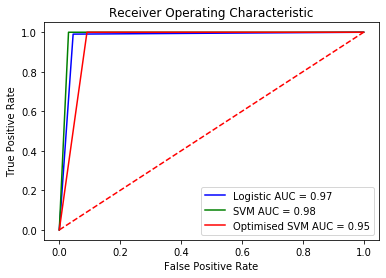

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Logistic AUC = %0.2f' % auc_score)
plt.plot(fpr2, tpr2, 'b', label = 'SVM AUC = %0.2f' % auc_score2, color='green')
plt.plot(fpr3, tpr3, 'b', label = 'Optimised SVM AUC = %0.2f' % auc_score3, color='red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')